CREATING A SPARK SESSION

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("example_app").config("spark.driver.meory","20g").getOrCreate()

In [3]:
spark

DEFINING THE SCHEMA

In [4]:
from pyspark.sql.types import IntegerType, StringType, BooleanType, DoubleType, StructType, StructField

In [5]:
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", BooleanType(), True),
    StructField("Domestic", BooleanType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", IntegerType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("Community Area", IntegerType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", IntegerType(), True),
    StructField("Y Coordinate", IntegerType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", StringType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])

LOADING THE DATA

In [6]:
df = spark.read.csv("Crimes_-_2001_to_Present.csv", schema, header=True)

In [7]:
df

DataFrame[ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [8]:
df.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|             

In [9]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



REMOVING THE NULL VALUES

In [10]:
from pyspark.sql.functions import col, sum

# Create a list of columns with their corresponding null counts
null_counts = []
for column in df.columns:
    null_count = df.filter(col(column).isNull()).count()
    null_counts.append((column, null_count))

In [11]:
# Filter columns with null values
columns_null = list(filter(lambda x: x[1] > 0, null_counts))

# Display columns with null values and their counts
for col_name, count in columns_null:
    print(f"Column '{col_name}' has {count} null values.")

Column 'Location Description' has 11937 null values.
Column 'District' has 47 null values.
Column 'Ward' has 614849 null values.
Column 'Community Area' has 613476 null values.
Column 'X Coordinate' has 90138 null values.
Column 'Y Coordinate' has 90138 null values.
Column 'Latitude' has 90138 null values.
Column 'Longitude' has 90138 null values.
Column 'Location' has 90138 null values.


In [12]:
#dropping the null values
df = df.na.drop()

In [13]:
df.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|08/31/2023 12:00:...|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|             

CHANGING 'Date' COLUMN DATA TYPE

In [14]:
from pyspark.sql.functions import to_timestamp

df = df.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy hh:mm:ss a"))

In [15]:
#showing the data types of the columns
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [16]:
df.select('Date')

DataFrame[Date: timestamp]

In [17]:
#counting the number of rows
df.count()

7214526

FILTERING THE DATA FOR THE LAST TEN YEARS

In [18]:
from pyspark.sql.functions import year, current_date

#Taking the present year
present_year = year(current_date())

#getting the last 10th year from the present year
last_tenth_year = present_year - 10

#filtering the last 10 years data
df_last_ten_year = df.filter((df['Year'] >= last_tenth_year) & (df['Year'] <= present_year))

In [19]:
df_last_ten_year.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13210088|   JG423627|2023-08-31 12:00:00|023XX W JACKSON BLVD|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|              STR

REMOVING ALL THE RECORDS WITH THE FOLLOWING CRIME TYPES:

'NON-CRIMINAL (SUBJECT SPECIFIED)'

'OTHER OFFENSE'

'STALKING'

'NON - CRIMINAL'

'ARSON'


In [20]:
# All values for the column Primary Type
unique_primary_types = df.select("Primary Type").distinct().collect()

# Print the list of unique values
for i in unique_primary_types:
    print(i[0])

OFFENSE INVOLVING CHILDREN
CRIMINAL SEXUAL ASSAULT
STALKING
PUBLIC PEACE VIOLATION
OBSCENITY
ARSON
GAMBLING
CRIMINAL TRESPASS
ASSAULT
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
THEFT
BATTERY
ROBBERY
HOMICIDE
CRIM SEXUAL ASSAULT
HUMAN TRAFFICKING
INTIMIDATION
PROSTITUTION
DECEPTIVE PRACTICE
CONCEALED CARRY LICENSE VIOLATION
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
KIDNAPPING
BURGLARY
WEAPONS VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
RITUALISM
PUBLIC INDECENCY
OTHER NARCOTIC VIOLATION
NON-CRIMINAL (SUBJECT SPECIFIED)
NON-CRIMINAL
NON - CRIMINAL


In [21]:
crime_types_remove = ['NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE', 'STALKING', 'NON - CRIMINAL','ARSON']

# Remove records with the specified crime types
df_removed_crime_types = df.where(~col("Primary Type").isin(crime_types_remove))

In [22]:
# All values for the column Primary Type
unique_primary_types = df_removed_crime_types.select("Primary Type").distinct().collect()

# Print the list of unique values
for i in unique_primary_types:
    print(i[0])

OFFENSE INVOLVING CHILDREN
CRIMINAL SEXUAL ASSAULT
PUBLIC PEACE VIOLATION
OBSCENITY
GAMBLING
CRIMINAL TRESPASS
ASSAULT
LIQUOR LAW VIOLATION
MOTOR VEHICLE THEFT
THEFT
BATTERY
ROBBERY
HOMICIDE
CRIM SEXUAL ASSAULT
HUMAN TRAFFICKING
INTIMIDATION
PROSTITUTION
DECEPTIVE PRACTICE
CONCEALED CARRY LICENSE VIOLATION
SEX OFFENSE
CRIMINAL DAMAGE
NARCOTICS
KIDNAPPING
BURGLARY
WEAPONS VIOLATION
INTERFERENCE WITH PUBLIC OFFICER
RITUALISM
PUBLIC INDECENCY
OTHER NARCOTIC VIOLATION
NON-CRIMINAL


# Merge the similar crime types.

For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.


In [23]:
from pyspark.sql.functions import when, col

In [24]:
df1 = df.withColumn("Primary Type", 
    when(df["Primary Type"].isin('CRIMINAL SEXUAL ASSAULT', 'SEXUAL ASSAULT','CRIM SEXUAL ASSAULT'),'SEX ASSAULT')
    .when(df["Primary Type"] == 'BATTERY', 'ASSAULT')
    .when(df["Primary Type"] == 'CRIMINAL DAMAGE', 'PROPERTY DAMAGE')
    .when(df["Primary Type"] == 'HOMICIDE', 'MURDER')
    .when(df["Primary Type"].isin('SEX OFFENSE', 'PROSTITUTION'), 'SEX OFFENSE')
    .when(df["Primary Type"].isin('CRIMINAL TRESPASS', 'ROBBERY', 'THEFT', 'BURGLARY','MOTOR VEHICLE THEFT'), 'ROBBERY/TRESPASS/THEFT/BURGLARY')
    .when(df["Primary Type"] == 'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE INTERFERENCE')
    .when(df["Primary Type"].isin('OTHER NARCOTIC VIOLATION','NARCOTIC','NARCOTICS'),'NARCOTICS')
    .when(df["Primary Type"].isin('LIQUOR LAW VIOLATION', 'RITUALISM', 'GAMBLING'), 'RITUALISM/GAMBLING/LAW VIOLATION')
    .when(df["Primary Type"] == 'PUBLIC INDECENCY', 'INDECENCY')
    .when(df["Primary Type"] == 'WEAPONS VIOLATION', 'WEAPONS')
    .otherwise(df['Primary Type']))

In [25]:
df.select("Primary Type").distinct().show(100,False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|CRIMINAL SEXUAL ASSAULT          |
|STALKING                         |
|PUBLIC PEACE VIOLATION           |
|OBSCENITY                        |
|ARSON                            |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|BATTERY                          |
|ROBBERY                          |
|HOMICIDE                         |
|CRIM SEXUAL ASSAULT              |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|PROSTITUTION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|SEX OFFENSE                      |
|CRIMINAL DAMAGE                  |
|NARCOTICS                        |
|OTHER OFFENSE              

# Analyze the data and present results:

Show year-wise trend of the crime for last ten years.

Find out at which hour of the day crime is highest.

Find top ten crimes and present them as a bar chart.

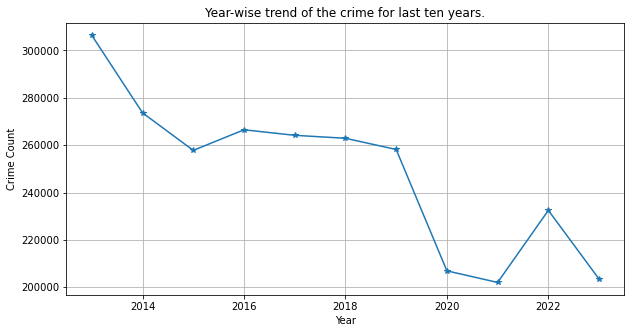

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, hour
import pandas as pd

# 1. Year-Wise Trend of Crime for the Last Ten Years
yearly_trend = df.filter(year("Date") >= 2013).groupBy(year("Date").alias("Year")).count().orderBy("Year")
yearly_trend_pandas = yearly_trend.toPandas()

plt.figure(figsize=(10, 5))
plt.plot(yearly_trend_pandas["Year"], yearly_trend_pandas["count"], marker='*')
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Year-wise trend of the crime for last ten years.")
plt.grid(True)
plt.show()

+----+------+
|Hour| count|
+----+------+
|  12|411833|
+----+------+
only showing top 1 row



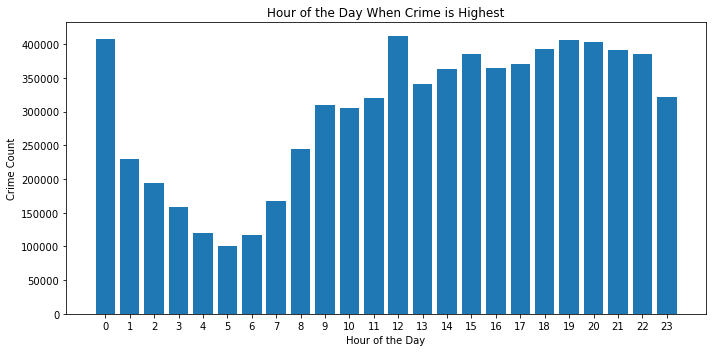

In [32]:
# 2. Find Hour of the Day When Crime is Highest
hourly_crime = df.groupBy(hour("Date").alias("Hour")).count().orderBy("count", ascending=False)
hourly_crime.show(1)  # Show the hour with the highest crime count

hourly_crime_pandas = hourly_crime.toPandas()
plt.figure(figsize=(10, 5))
plt.bar(hourly_crime_pandas["Hour"], hourly_crime_pandas["count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Count")
plt.title("Hour of the Day When Crime is Highest")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1527751|
|            BATTERY|1322655|
|    CRIMINAL DAMAGE| 827155|
|          NARCOTICS| 671437|
|            ASSAULT| 477396|
|      OTHER OFFENSE| 447688|
|           BURGLARY| 393858|
|MOTOR VEHICLE THEFT| 354048|
| DECEPTIVE PRACTICE| 310160|
|            ROBBERY| 273687|
+-------------------+-------+



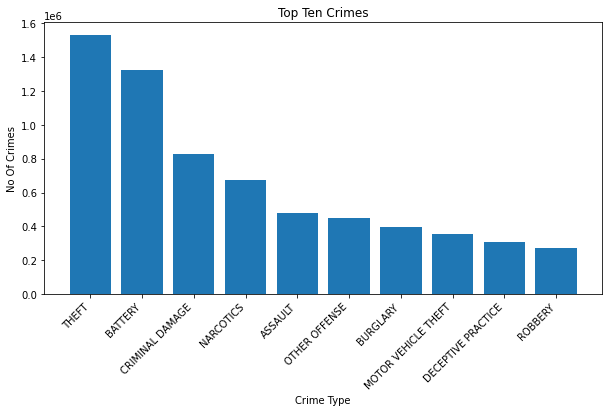

In [33]:
#3. Find top ten crimes and present them as a bar chart.

top_ten_crimes = df.groupBy("Primary Type").count().orderBy("count", ascending=False).limit(10)
top_ten_crimes.show()

top_ten_crimes_df = top10_crimes.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(top_ten_crimes_df["Primary Type"],top_ten_crimes_df["count"])
plt.xlabel("Crime Type")
plt.ylabel("No Of Crimes")
plt.title("Top Ten Crimes")
plt.xticks(rotation=45,ha="right")
plt.show()